# Research of ads for the sale of apartments

You have the data of the Yandex service at your disposal.Real Estate-archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your task is to set the parameters. This will allow you to build an automated system: it will track down anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on map data. For example, the distance to the center, the airport, the nearest park, and a pond.

# Research plan

- Stage 1. Pre-Training
  - Step 1. Import libraries.
  - Step 2. Opening a file, reading basic information
- Stage 2. Data preprocessing
  - Missing values.
  - Data type replacement.
- Stage 3. Revision of the table.
- Stage 4. Exploratory data analysis.

# Этап 1. Предподготовка. 

### Шаг 1. Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #более продвинутый вид библиотеки для постройки графиков, а заодно и чуть менее сложный в написании кода

### Шаг 2. Открытие файла, чтение основной информации


In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
df.info

<bound method DataFrame.info of       total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0      20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1      7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2      10\t5196000.0\t5

здесь можно увидеть, что файл разделен символом "\t", добавим это в сепаратор при чтении

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [5]:
df.info

<bound method DataFrame.info of        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartmen

In [6]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

### Вывод.

Итак, данные info показывают, что в данных наблюдениях присутствует 23699 строк с отдельными кейсами, а также 22 различных признака, характеризующих эти кейсы. 17 количественных признаков, 3 - типа object, 2 - типа Bool

# Этап 2. Предобработка данных

### Пропущенные значения.

In [7]:
columns_names = df.columns

In [8]:
for name in columns_names:
    print('Количество пропущенных значений для', name, '-', df[name].isna().sum(), '\n'
          'Процент пропущенных значений: {:.2%}'.format(df[name].isna().sum() / len(df[name])), '\n')

Количество пропущенных значений для total_images - 0 
Процент пропущенных значений: 0.00% 

Количество пропущенных значений для last_price - 0 
Процент пропущенных значений: 0.00% 

Количество пропущенных значений для total_area - 0 
Процент пропущенных значений: 0.00% 

Количество пропущенных значений для first_day_exposition - 0 
Процент пропущенных значений: 0.00% 

Количество пропущенных значений для rooms - 0 
Процент пропущенных значений: 0.00% 

Количество пропущенных значений для ceiling_height - 9195 
Процент пропущенных значений: 38.80% 

Количество пропущенных значений для floors_total - 86 
Процент пропущенных значений: 0.36% 

Количество пропущенных значений для living_area - 1903 
Процент пропущенных значений: 8.03% 

Количество пропущенных значений для floor - 0 
Процент пропущенных значений: 0.00% 

Количество пропущенных значений для is_apartment - 20924 
Процент пропущенных значений: 88.29% 

Количество пропущенных значений для studio - 0 
Процент пропущенных значений

Данный цикл показывает, сколько пропущенных значений в каждом из признаков. Здесь есть некоторые признаки, у которых пропущенных значений чрезвыайно много, например is_apartment, что составляет 88.29% 

Вот этот пример с пропущенными значениями для признака апартаментов - он является одним из тех, которые на мой взгляд невозможно заменить на медианное или среднее значение. Потому что он должен быть bool типа. Для количества парков рядом и расстояния до них и аэропортов - эти факторы, несомненно, могут повлиять на итоговую цену, но вот их распредление по городам не всегда равномерно, как и их качество, а потому, их наличие не всегда можно записывать в стопроцентное преимущество при ценообразовании.

Первая величина - days_exposition , посмотрим значения, которые свойственны этому признаку. 

In [9]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

Ничего примечательного тут особо нет, можем заменить отсутсвующие значения на какое-либо значение. Например на 0, что будет означать, что объявление все еще не закрыто.

In [10]:
df['days_exposition'] = df['days_exposition'].fillna(value=0)

In [11]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


locality_name - название населенного пункта, пропущено 49 раз. Заменить пропущенные значения на что-то - нереально, поставим вместо них "неизвестно"

In [12]:
df['locality_name'] = df['locality_name'].fillna(value='Неизвестно')

In [13]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно сразу заметить, что есть достаточно много уточнений статуса населенного пункта, можно отделить от них само название и статус

In [14]:
def new_name(name):
    name = name.replace('ё', 'е')
    if 'городской поселок' in name:
        new_name = name.replace('городской поселок ', '')
        return new_name
    elif 'поселок городского типа' in name:
        new_name = name.replace('поселок городского типа ', '')
        return new_name
    elif 'коттеджный поселок' in name:
        new_name = name.replace('коттеджный поселок ', '')
        return new_name
    elif 'поселок при железнодорожной станции' in name:
        new_name = name.replace('поселок при железнодорожной станции ', '')
        return new_name
    elif 'поселок станции' in name:
        new_name = name.replace('поселок станции ', '')
        return new_name
    elif 'поселок' in name:
        new_name = name.replace('поселок ', '')
        return new_name
    elif 'село' in name:
        new_name = name.replace('село ', '')
        return new_name
    elif 'деревня' in name:
        new_name = name.replace('деревня ', '')
        return new_name
    elif 'садоводческое некоммерческое товарищество' in name:
        new_name = name.replace('садоводческое некоммерческое товарищество ', '')
        return new_name
    elif 'садовое товарищество' in name:
        new_name = name.replace('садовое товарищество ', '')
        return new_name
    return name

In [15]:
df['just_name'] = df['locality_name'].apply(new_name)

In [16]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,just_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


In [17]:
df['just_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Названий стало меньше - 306

In [18]:
len(df['just_name'].unique())

306

Следующая графа у нас - cityCenters_nearest. Раз речь идет в том числе и о домах загородом, то удаленность от центра не всегда играет роль в цене, посмотрим, есть ли какая-то связь у пропусков населенного пункта с удаленностью от центра.

In [19]:
df[df['cityCenters_nearest'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5519 entries, 5 to 23698
Data columns (total 23 columns):
total_images            5519 non-null int64
last_price              5519 non-null float64
total_area              5519 non-null float64
first_day_exposition    5519 non-null object
rooms                   5519 non-null int64
ceiling_height          2944 non-null float64
floors_total            5509 non-null float64
living_area             4896 non-null float64
floor                   5519 non-null int64
is_apartment            628 non-null object
studio                  5519 non-null bool
open_plan               5519 non-null bool
kitchen_area            4804 non-null float64
balcony                 2809 non-null float64
locality_name           5519 non-null object
airports_nearest        1 non-null float64
cityCenters_nearest     0 non-null float64
parks_around3000        1 non-null float64
parks_nearest           1 non-null float64
ponds_around3000        1 non-null float64
pon

Для признака just_name есть 5519 пропущенных значений в столбце расстояния до центра.

In [20]:
cityCenters_justname_pivot = df.pivot_table(index='just_name', values='cityCenters_nearest')

In [21]:
cityCenters_justname_pivot

,cityCenters_nearest
just_name,
Александровская,27468.000000
Белоостров,38868.000000
Зеленогорск,54617.583333
Колпино,32113.771513
Красное Село,30020.284091
Кронштадт,49195.726316
Левашово,25727.000000
Лисий Нос,27613.333333
Ломоносов,50739.969697


In [22]:
len(cityCenters_justname_pivot)

28

Расстояние указано всего для 28 пунктов, что очень мало, наверняка на стадии разработки произошла какая-то ошибка. Заменять не будем, опять же, прямую связь между отдаленностью и ценой не всегда можно найти, а потому - лучше пока оставить эти пропущенные значения нетронутыми.

В подсказках к этому заданию уже было сказано, что скорее всего отсутвующее значение в графе балкона свидельствует о его отсутсвии - займемся этим. У нас 11519 пропущенных значений.

In [23]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Из перечисленных значений можем сделать вывод, что заменять пропущенные будем на 0

In [24]:
df['balcony'] = df['balcony'].fillna(value=0)

In [25]:
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Совсем другая картина.

is_apartment - переменная типа object, но должна быть bool, а соотвественно пропущенные значения нам предстоит заменять на соответсвующие.

In [26]:
df['is_apartment'].isna().sum()

20924

Допустим, что все пропущенные значения будут показывать отсутсвующую принадлежность к апартаментам. Заменем их на False, а заодно исключаим все возможные несоотвествия типу данных в ячейках, потому что тип данных здесь - object 

In [27]:
df['is_apartment'] = df['is_apartment'].replace('True', True)
df['is_apartment'] = df['is_apartment'].replace('False', False)

In [28]:
df['is_apartment'] = df['is_apartment'].fillna(value = False)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Теперь это то, что нам надо.

Теперь у нас для рассмотрения остались несколько столбцов -  ceiling_height и living_area, kitchen_area и floors_total

In [30]:
df['ceiling_height'].isna().sum()

9195

In [31]:
df['living_area'].isna().sum()

1903

In [32]:
df['kitchen_area'].isna().sum()

2278

Вот тут интересно, неуказанные значения могут появиться в связи с принадлежность к студиям.

In [33]:
df_studio = df.loc[(df['kitchen_area'].isnull()) & (df['studio'] == True)]

In [34]:
df_studio['studio'].value_counts()

True    149
Name: studio, dtype: int64

В 149 случаях площадь кухни не указана, потому что это студия.

Можем заменить эту площадь кухни на ноль

In [35]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0

В целом, можем попробовать посмотреть на связь общей площади и площади кухни.

In [36]:
kitchen_medians = df.pivot_table(index='living_area', values='kitchen_area',  aggfunc=['median', 'count'])

In [37]:
kitchen_medians.columns = ['median', 'count']

In [38]:
kitchen_medians

,median,count
living_area,,
2.0,4.5,2
3.0,13.5,2
5.0,0.0,1
5.4,9.8,1
6.0,17.0,1
...,...,...
322.3,19.5,1
332.0,22.0,1
347.5,25.0,1


In [39]:
df[df['rooms'] == 0].count()

total_images            197
last_price              197
total_area              197
first_day_exposition    197
rooms                   197
ceiling_height           82
floors_total            194
living_area             183
floor                   197
is_apartment            197
studio                  197
open_plan               197
kitchen_area            138
balcony                 197
locality_name           197
airports_nearest        118
cityCenters_nearest     118
parks_around3000        118
parks_nearest            29
ponds_around3000        118
ponds_nearest            69
days_exposition         197
just_name               197
dtype: int64

В 197 случах не указано количество комнат. Посмотрим, есть ли связь с признаком студии.

In [40]:
df.loc[(df['rooms'] == 0) & (df['studio'] == True)].count()

total_images            138
last_price              138
total_area              138
first_day_exposition    138
rooms                   138
ceiling_height           72
floors_total            135
living_area             128
floor                   138
is_apartment            138
studio                  138
open_plan               138
kitchen_area            138
balcony                 138
locality_name           138
airports_nearest         87
cityCenters_nearest      87
parks_around3000         87
parks_nearest            20
ponds_around3000         87
ponds_nearest            48
days_exposition         138
just_name               138
dtype: int64

В 138 случаях, когда квартира является студией, не указано количество комнат.

In [41]:
df.loc[(df['rooms'] == 0) & (df['is_apartment'] == True)].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
just_name               0
dtype: int64

А так как подобных апартаментов без указанного размера кухни у нас нет, то все пропуски значений для количества комнат равного нулу в студиях мы заменем на 1

In [42]:
def studio_room(row):
    if row['studio'] == True:
        row['rooms'] = 1
    return row['rooms']

In [43]:
df['rooms'] = df.apply(studio_room, axis = 1)

In [44]:
df[df['rooms'] == 0].count()

total_images            59
last_price              59
total_area              59
first_day_exposition    59
rooms                   59
ceiling_height          10
floors_total            59
living_area             55
floor                   59
is_apartment            59
studio                  59
open_plan               59
kitchen_area             0
balcony                 59
locality_name           59
airports_nearest        31
cityCenters_nearest     31
parks_around3000        31
parks_nearest            9
ponds_around3000        31
ponds_nearest           21
days_exposition         59
just_name               59
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21570 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Поговорим о высоте потолков.

In [46]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

есть странные значения, это нужно исправлять.

In [47]:
ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])

In [48]:
ceiling_medians.columns = ['median', 'count']

In [49]:
ceiling_medians

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666
6.0,3.00,619
7.0,3.00,398
8.0,2.80,220
9.0,2.55,2557


Данная таблица показывает медианные значения для различных показателей этажности домов.

In [50]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В списке этажности, который я вывел выше, отсутвуют некоторые значения этажа, а потому, для пропущенных я вставлю медианное значение высоты потолка

In [51]:
for floor in ceiling_medians.index:
    df.loc[(df['floors_total'].isna()) | 
             ((df['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = df['ceiling_height'].describe()[5]

Теперь точно также заменим медианными значениями места пропущенных высот потолков для домов с известной этажностью

In [52]:
for floor in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) & 
             (df['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

In [53]:
df['ceiling_height'].isna().sum()

0

А вот пропущенные значения этажей заменить на что-то среднее кажется невозможным, так как мы в дальнейшем будет изчуать этот признак, то лучше всего удалить все строки с пропущенными значениями, тем более - их не так много, всего 0.4%

In [54]:
df.dropna(subset=['floors_total'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21528 non-null float64
balcony                 23613 non-null float64
locality_name           23613 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

In [56]:
living_median = df.pivot_table(index='rooms', values='living_area', aggfunc=['median', 'count'])

In [57]:
living_median.columns = ['median', 'count']

In [58]:
living_median

,median,count
rooms,,
0,18.000,55
1,17.600,7496
2,30.500,7279
3,45.000,5353
4,63.500,1087
5,91.785,292
6,124.400,98
7,145.000,53
8,161.000,12


Для пропущенных значений жилой площади можно попробовать заменить их на медианнные значения в зависимости от количества комнат

In [59]:
for room in living_median.index:
    df.loc[(df['living_area'].isna()) |
          (df['rooms'] == room),
          'living_area'] = living_median.loc[room, 'median']

In [60]:
df['living_area'].isna().sum()

0

In [61]:
df['kitchen_area'].isna().sum()

2085

Вот тут интересно, неуказанные значения могут появиться в связи с принадлежность к студиям.

In [62]:
df_studio = df.loc[(df['kitchen_area'].isnull()) & (df['studio'] == True)]

In [63]:
df_studio['studio'].value_counts()

Series([], Name: studio, dtype: int64)

В 149 случаях площадь кухни не указана, потому что это студия.

Можем заменить эту площадь кухни на ноль

In [64]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0

В целом, можем попробовать посмотреть на связь общей площади и площади кухни.

In [65]:
kitchen_medians = df.pivot_table(index='total_area', values='kitchen_area',  aggfunc=['median', 'count'])

In [66]:
kitchen_medians.columns = ['median', 'count']

In [67]:
kitchen_medians

,median,count
total_area,,
12.0,NaN,0
13.0,NaN,0
13.2,NaN,0
14.0,2.0,1
15.0,NaN,0
...,...,...
590.0,100.0,1
618.0,70.0,1
631.0,60.0,1


Для некоторых значений нет медиан - исправим это

In [68]:
df['kitchen_area'].describe()

count    21528.000000
mean        10.492483
std          5.947796
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [69]:
for area in kitchen_medians.index:
    df.loc[(df['kitchen_area'].isna()) | 
             ((df['total_area'] == area) & (kitchen_medians.loc[area, 'count'] == 0)), 
             'kitchen_area'] = df['kitchen_area'].describe()[5]

In [70]:
df['kitchen_area'].isna().sum()

0

Заменим пропущенные значения на медианные в зависимости от общей площади.

In [71]:
for kitchen in kitchen_medians.index:
    df.loc[(df['kitchen_area'].isna()) & 
             (df['total_area'] == kitchen), 
             'kitchen_area'] = kitchen_medians.loc[kitchen, 'median']

In [72]:
df['kitchen_area'].isna().sum()

0

In [73]:
df[df['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,just_name


Ну а спропущенными значениями для расстояний мы не будем глубоко копать, заменим их на ноль.

In [74]:
df['airports_nearest'] = df['airports_nearest'].fillna(value=0)

In [75]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value=0)

### Замена типа данных.

Что-то мы уже заменили, осталось только заменить дату публикации со строчного типа на date

In [76]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [77]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,just_name
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,45.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,17.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,30.5,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,30.5,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


Заменим также тип данных в расстояниях, которые нам нужны, на int

In [78]:
df['airports_nearest'] = df['airports_nearest'].astype('int')

In [79]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

# Этап 3. Доработка таблицы.

Цена квадратного метра

In [80]:
df['price_per_sqm'] = round(df['last_price'] / df['total_area'], 1)

День недели публикации

In [81]:
df['weekday'] = df['first_day_exposition'].dt.weekday

Месяц публицации

In [82]:
df['month'] = df['first_day_exposition'].dt.month

Год публикации

In [83]:
df['year'] = df['first_day_exposition'].dt.year

Классификация этажей

In [84]:
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'
df.loc[df['floor_category'].isna(), 'floor_category'] = 'другой'

соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [85]:
df['living_area_ratio'] = round(df['living_area'] / df['total_area'], 3)
df['kitchen_area_ratio'] = round(df['kitchen_area'] / df['total_area'], 3)

In [86]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,just_name,price_per_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,45.0,8,False,...,755.0,0.0,Санкт-Петербург,120370.4,3,3,2019,другой,0.417,0.231
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,17.6,1,False,...,NaN,81.0,Шушары,82920.8,1,12,2018,первый,0.436,0.272
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,30.5,4,False,...,574.0,558.0,Санкт-Петербург,92785.7,3,8,2015,другой,0.545,0.148
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,False,...,234.0,424.0,Санкт-Петербург,408176.1,4,7,2015,другой,0.283,0.057
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,30.5,13,False,...,48.0,121.0,Санкт-Петербург,100000.0,1,6,2018,другой,0.305,0.410


 # Этап 4. Исследовательский анализ данных.

Сейчас предстоит изучить несколько парметров и построить гистограммы.

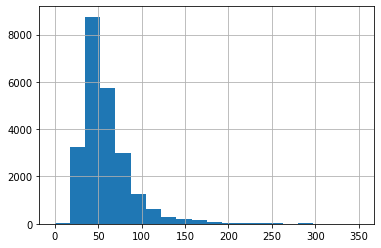

In [87]:
df['total_area'].hist(bins=20, range=(0, 350))

In [88]:
df['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

In [89]:
iqr = df['total_area'].describe()[6] - df['total_area'].describe()[4]
left = round(df['total_area'].describe()[4] - 1.5 * iqr, 2)
right = round(df['total_area'].describe()[6] + 1.5 * iqr, 2)
if left < df['total_area'].describe()[3]:
    left = df['total_area'].describe()[3]
if right > df['total_area'].describe()[7]:
    right = df['total_area'].describe()[7]
    
    
print(left, right)    

12.0 114.5


Text(0.5, 1.0, 'Общая площадь кв. м')

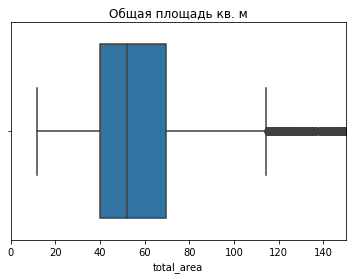

In [90]:
sns.boxplot(df['total_area'])
plt.xlim(0,150)
plt.title('Диаграмма размаха')
plt.title('Общая площадь кв. м')

Text(0, 0.5, 'Частота')

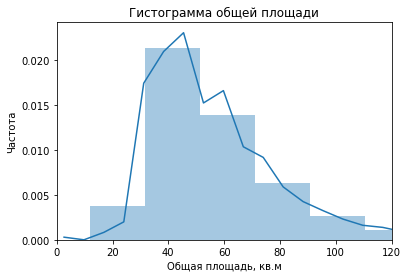

In [91]:
sns.distplot(df['total_area'], bins=45)
plt.xlim(0,120)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')

Эта гистограмма показывает более нормальные значения, без резких выбросов

Заодно сразу запишем, является ли значение аномальным или нет

In [92]:
df['too_large_area'] = df['total_area'] > right

In [93]:
df['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

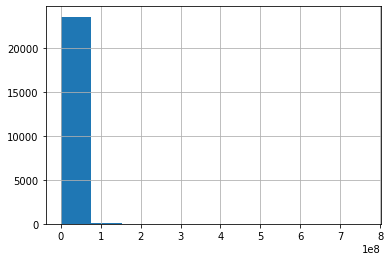

In [94]:
df['last_price'].hist()

In [95]:
iqr = df['last_price'].describe()[6] - df['last_price'].describe()[4]
left = round(df['last_price'].describe()[4] - 1.5 * iqr, 2)
right = round(df['last_price'].describe()[6] + 1.5 * iqr, 2)
if left < df['last_price'].describe()[3]:
    left = df['last_price'].describe()[3]
if right > df['last_price'].describe()[7]:
    right = df['last_price'].describe()[7]
    
    
print(left, right) 

12190.0 11897500.0


Выглядит как гистограмма, полная выбросов, разберемся с этим

(0, 13000000)

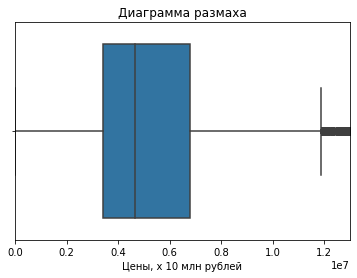

In [96]:
sns.boxplot(df['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('Цены, х 10 млн рублей')
plt.xlim(0,  13000000)

Медиана - 4.65 млн., эта диаграмма размаха поможет нам понять, как дальше строить график

Text(0, 0.5, 'Частота')

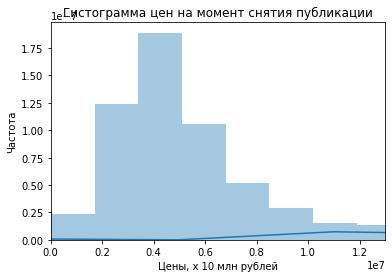

In [97]:
sns.distplot(df['last_price'], bins=450)
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, x 10 млн рублей')
plt.ylabel('Частота')

In [98]:
df['too_expensive'] = df['last_price'] > right

Подавляющее число представленных в выборке квартир стоят порядка 4 - 4,5 млн. рублей

In [99]:
df['rooms'].describe()

count    23613.000000
mean         2.076864
std          1.070002
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [100]:
iqr = df['rooms'].describe()[6] - df['rooms'].describe()[4]
left = round(df['rooms'].describe()[4] - 1.5 * iqr, 2)
right = round(df['rooms'].describe()[6] + 1.5 * iqr, 2)
if left < df['rooms'].describe()[3]:
    left = df['rooms'].describe()[3]
if right > df['rooms'].describe()[7]:
    right = df['rooms'].describe()[7]
    
    
print(left, right) 

0.0 6.0


(0, 10)

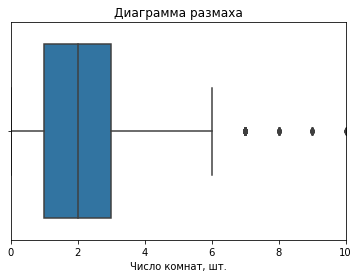

In [101]:
sns.boxplot(df['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')
plt.xlim(0, 10)

Text(0, 0.5, 'Частота')

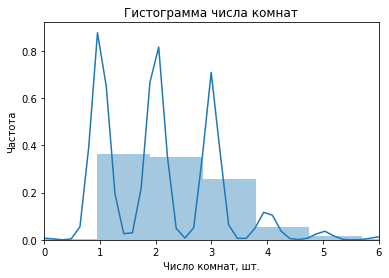

In [102]:
sns.distplot(df['rooms'], bins=20)
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Частота')

Больше всего на рынке одно- и двухкомнтаных квартир.

In [103]:
df['too_many_rooms'] = df['rooms'] > right

In [104]:
df['ceiling_height'].describe()

count    23613.000000
mean         2.735913
std          0.996070
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [105]:
iqr = df['ceiling_height'].describe()[6] - df['ceiling_height'].describe()[4]
left = round(df['ceiling_height'].describe()[4] - 1.5 * iqr, 2)
right = round(df['ceiling_height'].describe()[6] + 1.5 * iqr, 2)
if left < df['ceiling_height'].describe()[3]:
    left = df['ceiling_height'].describe()[3]
if right > df['ceiling_height'].describe()[7]:
    right = df['ceiling_height'].describe()[7]
    
    
print(left, right) 

2.25 3.05


(1, 4)

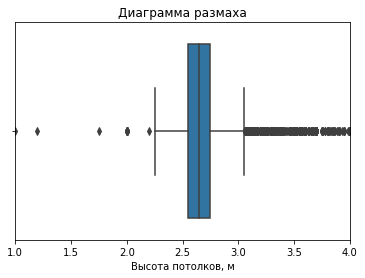

In [106]:
sns.boxplot(df['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')
plt.xlim(1, 4)

Здесь придется посчитать интеркватильный размах и выяснить границы, в которые входят нормальные значения

Text(0, 0.5, 'Частота')

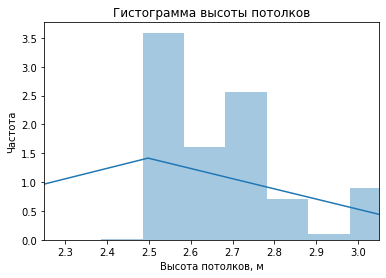

In [107]:
sns.distplot(df['ceiling_height'], bins=1000)
plt.xlim(left, right)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')

Большая часть потолков приходится на группу в 2.5 метра

In [108]:
df['unusual_ceiling'] = ((df['ceiling_height'] > right) | (df['ceiling_height'] < left))

In [109]:
df['days_exposition'].describe()

count    23613.000000
mean       156.586075
std        213.502550
min          0.000000
25%         22.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [110]:
iqr = df['days_exposition'].describe()[6] - df['days_exposition'].describe()[4]
left = round(df['days_exposition'].describe()[4] - 1.5 * iqr, 2)
right = round(df['days_exposition'].describe()[6] + 1.5 * iqr, 2)
if left < df['days_exposition'].describe()[3]:
    left = df['days_exposition'].describe()[3]
if right > df['days_exposition'].describe()[7]:
    right = df['days_exposition'].describe()[7]
    
    
print(left, right) 

0.0 464.5


(0, 480)

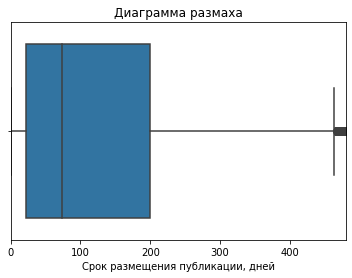

In [111]:
sns.boxplot(df['days_exposition'])
plt.title('Диаграмма размаха')
plt.xlabel('Срок размещения публикации, дней')
plt.xlim(0, 480)

Text(0, 0.5, 'Частота')

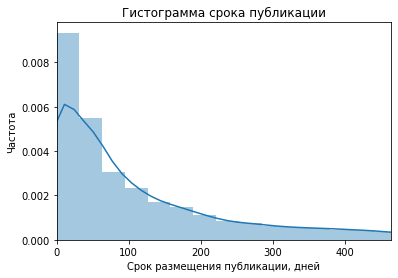

In [112]:
sns.distplot(df['days_exposition'], bins=50)
plt.xlim(left, right)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
plt.ylabel('Частота')

Подавляющее большинство квартир продается в течение первых 100 дней. Медиана равна 73 дням, а соответсвенно, все что заняло меньше этого времени, на мой взгляд, можно считать быстрой продажей. Но если эта продажа пришлась на первые 25 дней, что является 25% квартилем, то продажа будет аномально быстрой. Все, что больше 200 дней - это очень долго, как мы видим н адиаграмме размаха. 

In [113]:
df['too_slow'] = df['days_exposition'] > right
df['too_fast'] = df['days_exposition'] < 30

### Разберемся с редкими значениями.

Я уже записал в новые столбцы необычные значения, осталось выяснить, какова доля нормальных.

In [114]:
good_data = df[(df['too_large_area'] == False) & 
     (df['too_expensive'] == False) &
     (df['too_many_rooms'] == False) &
     (df['unusual_ceiling'] == False) &
     (df['too_slow'] == False) &
     (df['too_fast'] == False)].reset_index(drop=True)

print('Доля нормальных значений составила: {:.1%}'. format(len(good_data) / len(df)))

Доля нормальных значений составила: 56.1%


На самом деле, особенностей в данных было предостаточно, чего только стоят различные неправильные значения высоты потолка, достигающие 100 м, а также нулевая этажность и нулевые показатели количества комнат.

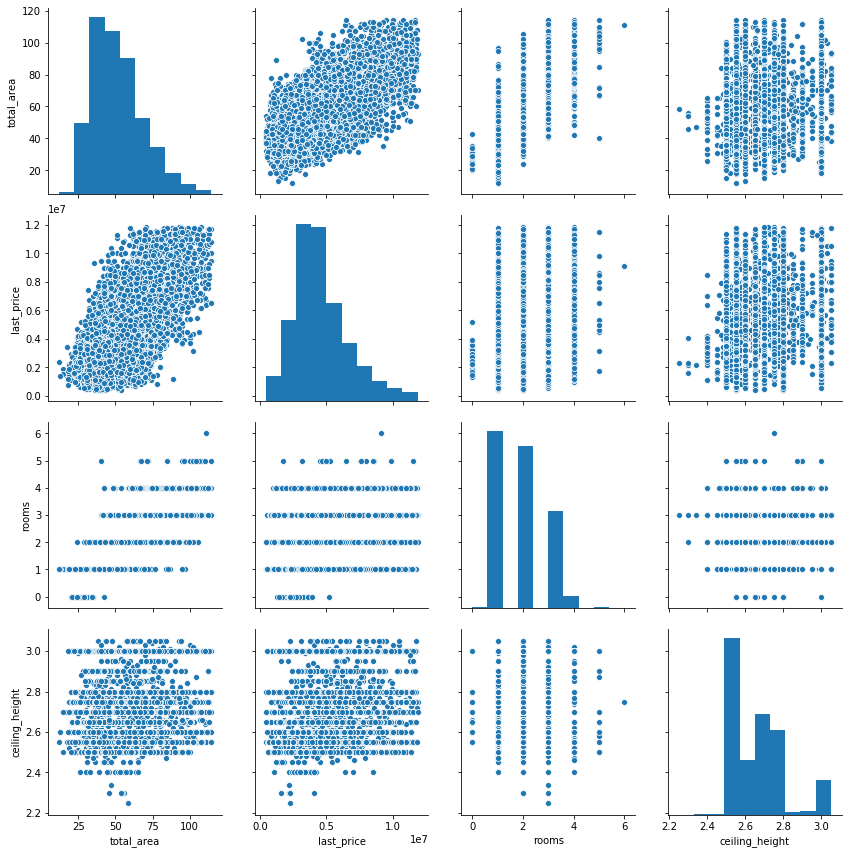

In [115]:
sns.pairplot(good_data, 
                 vars=['total_area', 'last_price', 'rooms', 'ceiling_height'],
                 height=3)

### Изучим факторы, влияющие на стоимость квартиры.

In [116]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year,floor_category,living_area_ratio,kitchen_area_ratio,too_large_area,too_expensive,too_many_rooms,unusual_ceiling,too_slow,too_fast
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,45.0,8,False,...,2019,другой,0.417,0.231,False,True,False,False,False,True
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,17.6,1,False,...,2018,первый,0.436,0.272,False,False,False,False,False,False
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,30.5,4,False,...,2015,другой,0.545,0.148,False,False,False,False,True,False
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,False,...,2015,другой,0.283,0.057,True,True,False,False,False,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,30.5,13,False,...,2018,другой,0.305,0.410,False,False,False,False,False,False


In [117]:
good_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'just_name', 'price_per_sqm',
       'weekday', 'month', 'year', 'floor_category', 'living_area_ratio',
       'kitchen_area_ratio', 'too_large_area', 'too_expensive',
       'too_many_rooms', 'unusual_ceiling', 'too_slow', 'too_fast'],
      dtype='object')

Посмотрим на зависимость цены за квадратный метр от площади

In [118]:
good_data['last_price'].corr(good_data['total_area'])

0.6892052822450225

Коэффициент корреляции Пирсона довольно значительный, положительный, что показывает нам, что чем больше блощадь, тем больше и общая цена, но это достаточно очевидно, посмотрим лучше на цену за квадратный метр

In [119]:
good_data['price_per_sqm'].corr(good_data['total_area'])

-0.07852013277328257

А вот корреляции с ценой за квадратный метр почти нет.

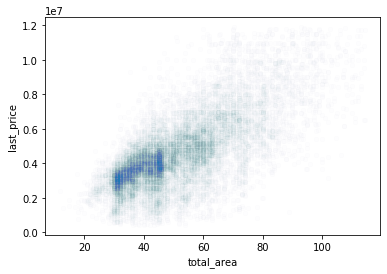

In [120]:
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.007)

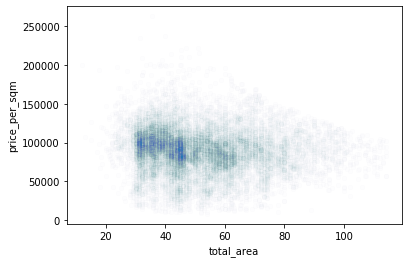

In [121]:
good_data.plot(x='total_area', y='price_per_sqm', kind='scatter', alpha=0.007)

Cвязь с количеством комнат.

In [122]:
good_data['last_price'].corr(good_data['rooms'])

0.41716065071277025

In [123]:
good_data['price_per_sqm'].corr(good_data['rooms'])

-0.2392942795652753

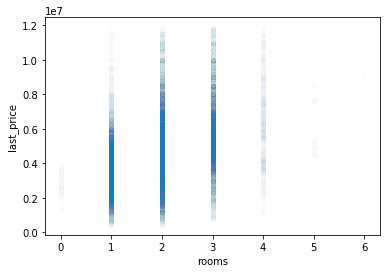

In [124]:
good_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.007)

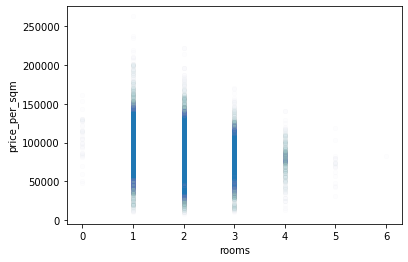

In [125]:
good_data.plot(x='rooms', y='price_per_sqm', kind='scatter', alpha=0.007)

Удалленость от центра.

In [126]:
good_data['last_price'].corr(good_data['cityCenters_nearest'])

0.15313431711887435

In [127]:
good_data['price_per_sqm'].corr(good_data['cityCenters_nearest'])

0.2227141524576424

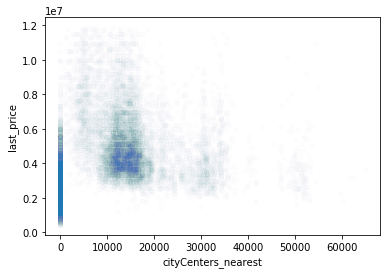

In [128]:
good_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.007)

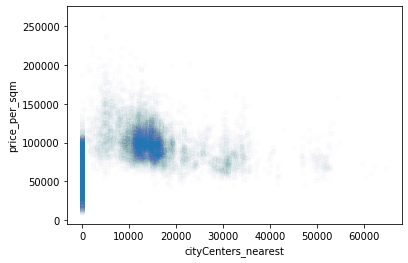

In [129]:
good_data.plot(x='cityCenters_nearest', y='price_per_sqm', kind='scatter', alpha=0.007)

Зависимость от числа комнат, этажа квартиры и времени публицации.

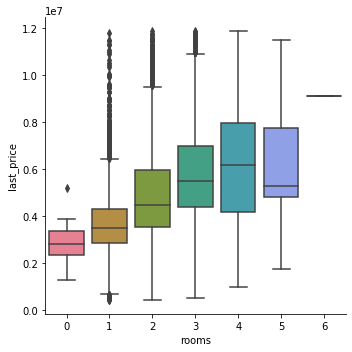

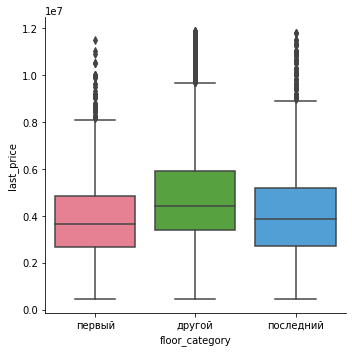

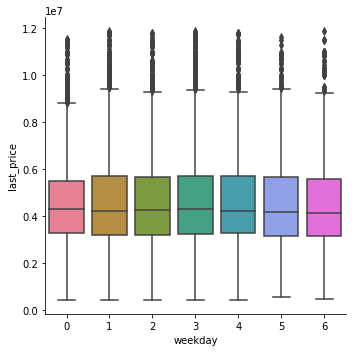

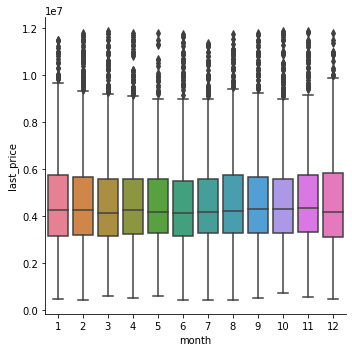

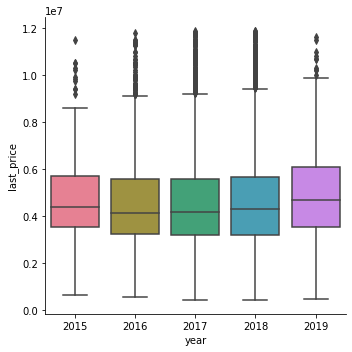

In [130]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data, palette='husl')

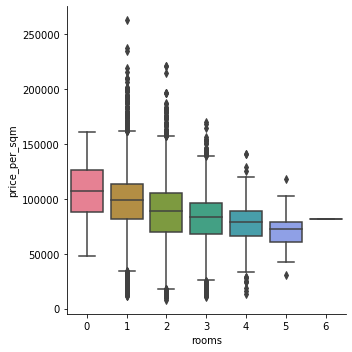

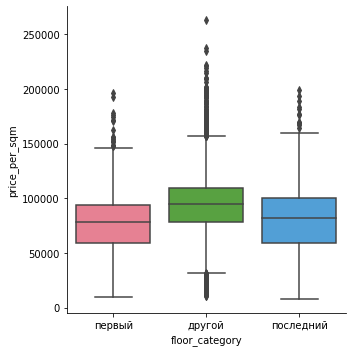

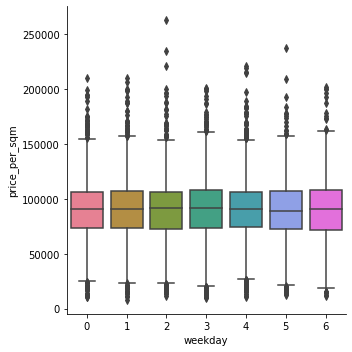

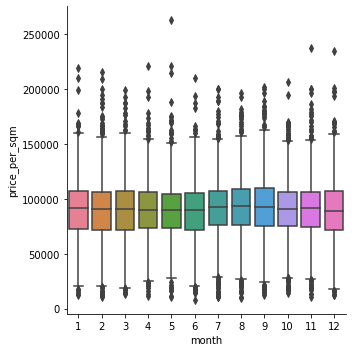

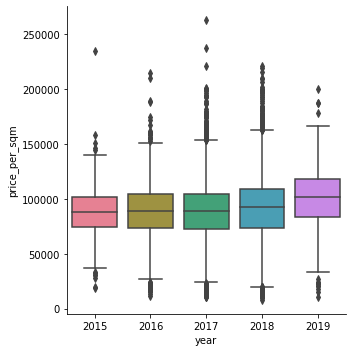

In [131]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="price_per_sqm", kind="box", data=good_data, palette='husl')

#### conclusion:

The strongest correlation is observed between the area of the apartment and its cost.
The distance to the city center can affect the cost of the apartment, but since I did not remove the missing values in principle and replaced them with zero, I guess that my value is strongly biased.
The number of rooms also strongly determines the cost of an apartment, the most expensive-three-room and four-room.
Apartments on the first or last floor have a lower price than apartments on other floors.
The day of the week and the month of publication of the ad do not play a significant role in the price at which the property will be sold. In all years, the values for prices were approximately the same, except that in 2019 they slightly increased, maybe this is due to the fact that 2019 was quite stable.

### 10 населенных пунктов.

In [132]:
median_price_sqr = df.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['median', 'count'])

In [133]:
median_price_sqr.columns = ['median', 'count']

In [134]:
df2 = median_price_sqr.sort_values(by='count', ascending=False).head(10)

In [135]:
df2

,median,count
locality_name,,
Санкт-Петербург,104774.50,15651
посёлок Мурино,85878.45,520
посёлок Шушары,76829.30,439
Всеволожск,65789.50,398
Пушкин,100000.00,369
Колпино,74723.75,338
посёлок Парголово,91642.90,327
Гатчина,67796.60,307
деревня Кудрово,91860.50,299


In [136]:
average_price10 = df2['median'].mean()


In [137]:
average_price10

81745.38

Средняя цена за квадратный метр в выбранных 10 наиболее популярных населенных пунктах.

In [138]:
minim = df2['median'].min()

maxim = df2['median'].max()



In [139]:
minim

58158.3

In [140]:
maxim

104774.5

In [141]:
print('Минимальная цена среди 10 выбранных поселков:', minim, 'в поселке: Выборг') 

Минимальная цена среди 10 выбранных поселков: 58158.3 в поселке: Выборг


In [142]:
print('Максимальная цена среди 10 выбранных поселков:', maxim, 'в поселке: Санкт-Петербург') 

Максимальная цена среди 10 выбранных поселков: 104774.5 в поселке: Санкт-Петербург


### Выделение центра 

In [143]:
df['citycenters_km'] = round(df['cityCenters_nearest'] / 1000, 0)
df['citycenters_km'] = df['citycenters_km'].astype('int', errors='ignore')
good_data = df[(df['too_large_area'] == False) & 
     (df['too_expensive'] == False) &
     (df['too_many_rooms'] == False) &
     (df['unusual_ceiling'] == False) &
     (df['too_slow'] == False) &
     (df['too_fast'] == False)].reset_index(drop=True)
good_data.loc[(good_data['locality_name'] == 'Санкт-Петербург') & (good_data['citycenters_km'].notna()), 'citycenters_km'].apply(round)
spb_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index='citycenters_km', values=['price_per_sqm', 'last_price'], aggfunc='median')
spb_center_nearest.head()

,last_price,price_per_sqm
citycenters_km,,
0,5595000.0,110497.35
1,7800000.0,107627.10
2,7850000.0,109375.00
3,6900000.0,104166.70
4,6925000.0,110966.50


/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


Text(0.5, 6.799999999999997, 'Расстояния до центра')

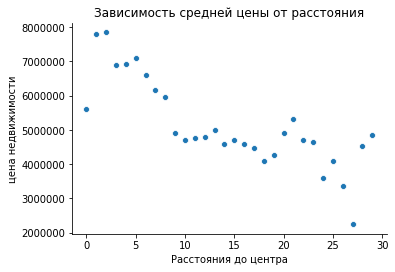

In [144]:
sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest, height=4, aspect=1.4)
plt.title('Зависимость средней цены от расстояния')
plt.ylabel('цена недвижимости')
plt.xlabel('Расстояния до центра')


Разницу в миллион рублей можно заметить на расстоянии в 8 - 10 км - это и есть граница сильного изменения. Центр будем считать до 9 км.

In [145]:
spb_center = good_data[(good_data['citycenters_km'] <= 8) & (good_data['locality_name'] == 'Санкт-Петербург')]

### Анализ центральных квартир в Санкт-петербурге.

In [146]:
print(spb_center['total_area'].describe())

count    1311.000000
mean       60.728863
std        19.665485
min        12.000000
25%        45.000000
50%        59.000000
75%        74.000000
max       114.200000
Name: total_area, dtype: float64


Text(0.5, 0, 'Общая площадь, кв. м')

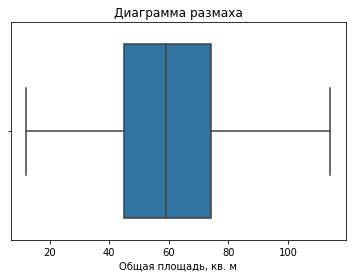

In [147]:
sns.boxplot(spb_center['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв. м')

In [148]:
print(spb_center['last_price'].describe())

count    1.311000e+03
mean     6.940762e+06
std      2.161242e+06
min      2.250000e+06
25%      5.300000e+06
50%      6.700000e+06
75%      8.500000e+06
max      1.187925e+07
Name: last_price, dtype: float64


Text(0.5, 0, 'Цена, 10 млн рублей')

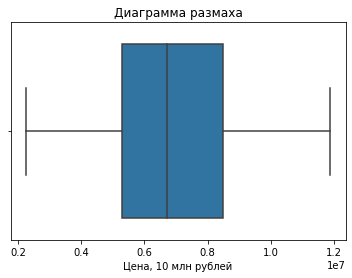

In [149]:
sns.boxplot(spb_center['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('Цена, 10 млн рублей')

In [150]:
print(spb_center['rooms'].describe())

count    1311.000000
mean        2.137300
std         0.901774
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


Text(0.5, 0, 'Число комнат, шт.')

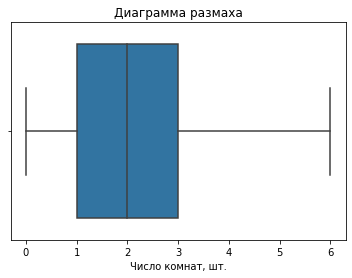

In [151]:
sns.boxplot(spb_center['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')

In [152]:
print(spb_center['ceiling_height'].describe())

count    1311.000000
mean        2.755591
std         0.184734
min         2.400000
25%         2.550000
50%         2.750000
75%         3.000000
max         3.050000
Name: ceiling_height, dtype: float64


Text(0.5, 0, 'Высота потолка')

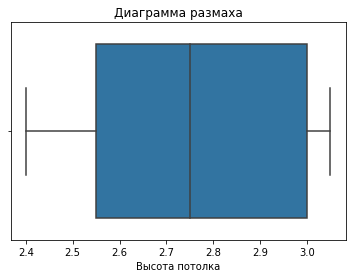

In [153]:
sns.boxplot(spb_center['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолка')

In [154]:
print(spb_center['days_exposition'].describe())

count    1311.000000
mean      152.625477
std       111.825249
min        30.000000
25%        60.000000
50%       113.000000
75%       214.000000
max       464.000000
Name: days_exposition, dtype: float64


Text(0.5, 0, 'Срок размещения публикации, дней')

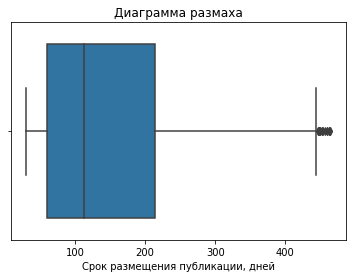

In [155]:
sns.boxplot(spb_center['days_exposition'])
plt.title('Диаграмма размаха')
plt.xlabel('Срок размещения публикации, дней')

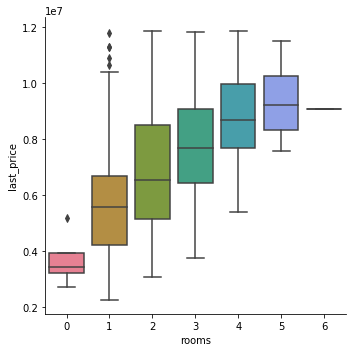

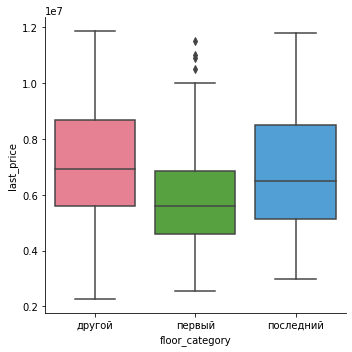

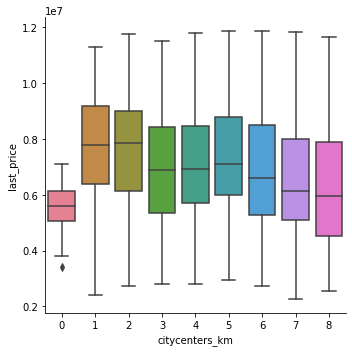

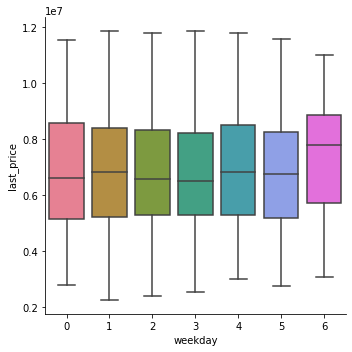

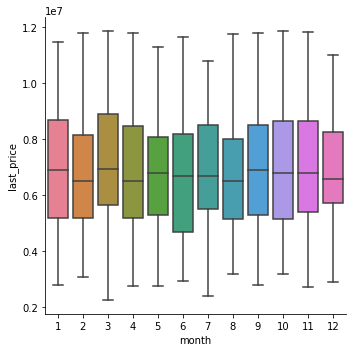

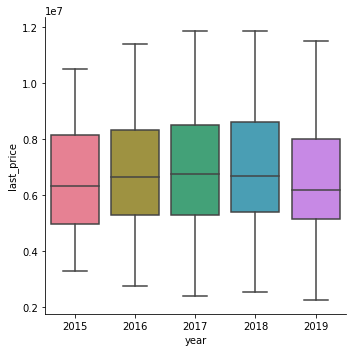

In [156]:
for column in ['rooms', 'floor_category', 'citycenters_km', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_center, palette='husl')

Стандартная квартира в Петербурге имеет две комнаты, 60 кв метров, с потолками примерно в 2.75 м, на продажу которой уходит примерно 100 дней и около 7 млн рублей. 

Еще несколько замечаний: здесь уже появляется спрос на большие квартиры, что скорее всего связано с тем, что здесь люди богаче, чем в пригороде и на удалении от центра. А еще здесь с большей охотой берут квартиры на верхних этажах, так как в городе хочется видеть солнце и небо, а потому цены на них выше. Интересно и то, что по воскресеньям людей больше привлекают объявления и они охотней покупают квартиры.

# Conclusion

- In this project, I did a fairly extensive work with the values that were present in it initially, and quite a lot of new columns were added. And all because the initial data is a value with a large number of missed cases and abnormal outliers. As a result, the proportion of normally distributed values, exactly what we need to provide a valid result, in my case, was 56.1 %, which is actually not so much, at least in my opinion.

- In addition, an analysis of the dependence of the price on various characteristics was carried out, and I decided not to dwell on the final price, but also to take into account the price per square meter in this study, which seems to me necessary.

- The essence of this decision is that for many obvious reasons, the price for the same apartment with a larger area will also be higher, and therefore it is more interesting to compare the price per square meter. And so, I found out that the price per square meter decreases with the increase in the total area, although slightly, so much, in fact,that we already take it for an error. The same trend can be seen in the graphs describing these correlations - as the area increases, the price increases and the price per square meter falls slightly. This leads to the following conclusion - the number of rooms also determines the cost of an apartment or house, however, not as much as the total area, but the correlation between the price per square meter and the number of rooms is already much stronger, although still insignificant and also has a negative character , which means a decrease in the price per square meter with an increase in rooms.

- I'm afraid to turn the conclusion into just a statement of my guesses and feelings that arise in the course of viewing my results, but I can say frankly that I am slightly disappointed in some of the data obtained. For example: the proximity to the center and the price for housing showed a very low level of correlation with both the total price and the price per square meter, but it can be noted that it has a positive character.

- The analysis of the dependence on the floor and the date of publication showed that closer to the city center, people prefer the top floor to all the others, while in the distance, people choose the middle, or at least not the two extreme floors. As for the specific dates of withdrawal of publications, it becomes obvious that people tend to buy in August - September, most likely this is due to the fact that often September 1 for many from school times remains a kind of watershed between the old and new life, the least popular month is May / June: people go on vacation and they do not have time to buy real estate.

